In [1]:
#### Given some cricket data like below - 
    # runs, balls, 4s , 6s

# below KPIs can be taken out in parallel execution
    # SR? 
    # % run via boundary?
    # balls per boundary?

In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [3]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bp: float
    bpb: float

In [4]:
# graph

graph = StateGraph(BatsmanState)

In [5]:
# nodes
def calculate_sr(state: BatsmanState) -> BatsmanState:
    sr = round((state['runs']/state['balls'])*100, 2)
    return {'sr':sr}

def calculate_bpb(state: BatsmanState) -> BatsmanState:
    bpb = state['balls']/(state['fours'] + state['sixes'])
    return {'bpb':bpb}

def calculate_bp(state: BatsmanState) -> BatsmanState:
    bp = round((((4*state['fours']) + (6*state['sixes'])) / state['runs'])*100, 2)
    return {'bp':bp}

def calculate_summary(state: BatsmanState) -> BatsmanState:
    summary = f"""
            sr  ->  {state['sr']}
            bpb ->  {state['bpb']}
            bp  ->  {state['bp']}
            """
    return {'state': state}


In [6]:
# adding nodes
graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bp', calculate_bp)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_summary', calculate_summary)

In [7]:
# adding edge

graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bp')
graph.add_edge(START, 'calculate_bpb')

graph.add_edge('calculate_sr',  'calculate_summary')
graph.add_edge('calculate_bp',  'calculate_summary')
graph.add_edge('calculate_bpb', 'calculate_summary')

graph.add_edge('calculate_summary', END)

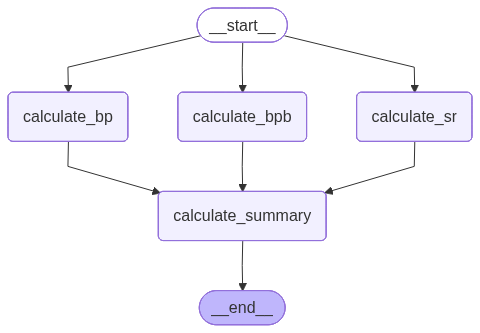

In [8]:
# compile
workflow = graph.compile()
graph.compile()

In [9]:
workflow.invoke({'runs':120, 'balls':100, 'fours':5, 'sixes':5})

{'runs': 120,
 'balls': 100,
 'fours': 5,
 'sixes': 5,
 'sr': 120.0,
 'bp': 41.67,
 'bpb': 10.0}